In [1]:
import numpy as np
import networkx as nx
import ternary
import math
from pylab import cm
import matplotlib.pyplot as plt

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


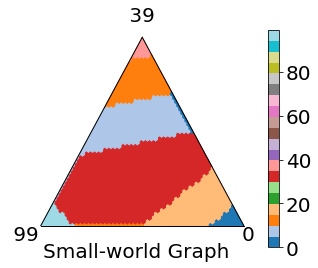

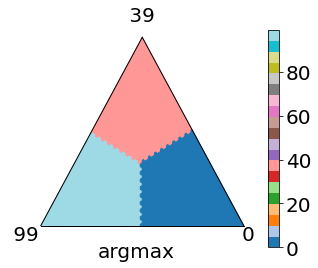

In [2]:

import matplotlib
from matplotlib.pyplot import colorbar
from functools import partial

n = 100

G = nx.connected_watts_strogatz_graph(n=n, k=5, p=0.8)
#G = nx.grid_graph(dim=(10, 10))
#G = nx.random_tree(n)

d = nx.floyd_warshall_numpy(G)
d2 = d**2
#nx.draw(G)
#plt.matshow(d)
inds = []

mid = 39

def argmax(p):
    classes = np.array([0, mid, n-1])
    return classes[np.argmax(p)]

def frechet_mean(p, d2):
    p = np.array(p)
    p = p[None, :]
    return np.argmin(np.dot(p, d2[[0, mid, n-1], :]), axis=1)





font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

scale = 50
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5, 4)
tax.heatmapf(
    partial(frechet_mean, d2=d2), 
    # argmax,
    boundary=True, style="hexagonal", 
    cmap=cm.get_cmap('tab20', n))
tax.boundary(linewidth=1.0)
#tax.set_title("Loki class predictions")
tax.bottom_axis_label("Small-world Graph", offset=0.1)
tax.right_corner_label("0   ")
tax.top_corner_label(f" {mid} ")
tax.left_corner_label(" 99 ")
#tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.savefig('frechet.pdf')

scale = 50
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5, 4)
tax.heatmapf(
    #partial(frechet_mean, d2=d2), 
    argmax,
    boundary=True, style="hexagonal", 
    cmap=cm.get_cmap('tab20', n))
tax.boundary(linewidth=1.0)
#tax.set_title("argmax class predictions")
tax.bottom_axis_label("argmax", offset=0.1)
tax.right_corner_label("0   ")
tax.top_corner_label(f" {mid} ")
tax.left_corner_label(" 99 ")
#tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.savefig('argmax.pdf')

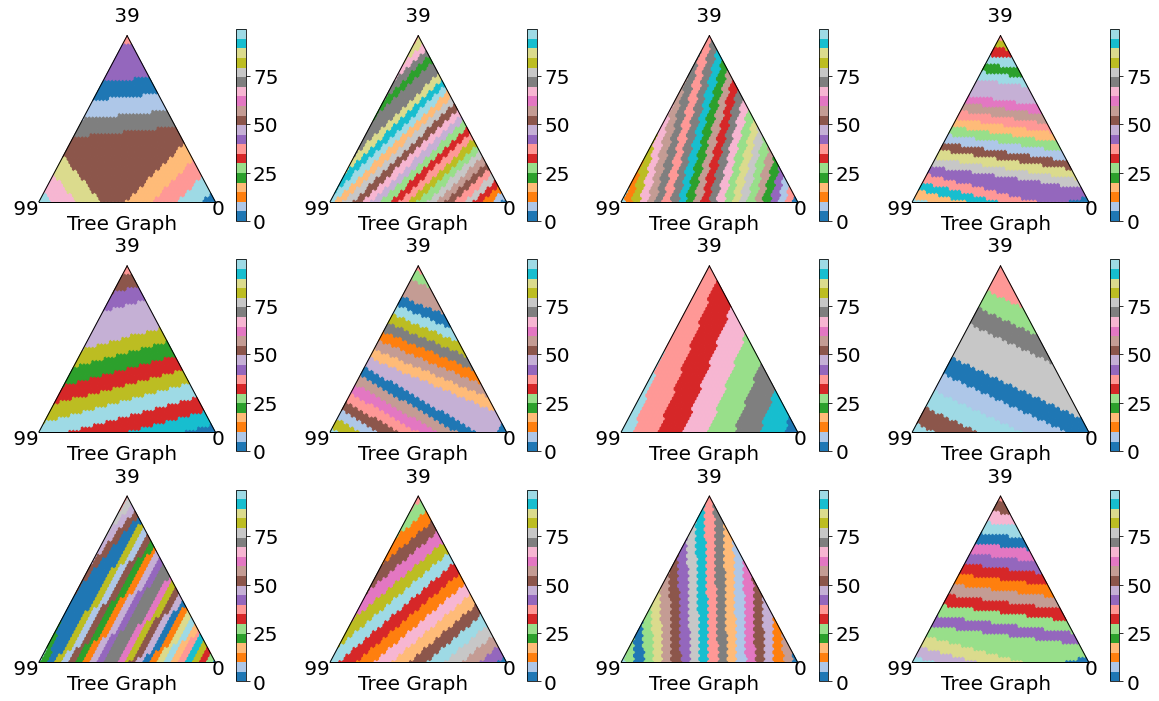

In [46]:

import matplotlib
from matplotlib.pyplot import colorbar
from functools import partial





font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

nrow = 3
ncol = 4
fig, axs = plt.subplots(nrow, ncol, figsize=(5*ncol, 4*nrow))

for i in range(len(axs)):
    for j in range(len(axs[i])):

        n = 100
        #G = nx.connected_watts_strogatz_graph(n=n, k=5, p=0.8)
        #G = nx.grid_graph(dim=(10, 10))
        G = nx.random_tree(n)

        d = nx.floyd_warshall_numpy(G)
        d2 = d**2
        #nx.draw(G)
        #plt.matshow(d)
        inds = []

        mid = 39

        def argmax(p):
            classes = np.array([0, mid, n-1])
            return classes[np.argmax(p)]

        def frechet_mean(p, d2):
            p = np.array(p)
            p = p[None, :]
            return np.argmin(np.dot(p, d2[[0, mid, n-1], :]), axis=1)

        scale = 50
        figure, tax = ternary.figure(ax=axs[i,j], scale=scale)
        #figure.set_size_inches(5, 4)
        tax.heatmapf(
            partial(frechet_mean, d2=d2), 
            # argmax,
            boundary=True, style="hexagonal", 
            cmap=cm.get_cmap('tab20', n))
        tax.boundary(linewidth=1.0)
        #tax.set_title("Loki class predictions")
        tax.bottom_axis_label("Tree Graph", offset=0.1)
        tax.right_corner_label("0   ")
        tax.top_corner_label(f" {mid} ")
        tax.left_corner_label(" 99 ")
        #tax.ticks(axis='lbr', linewidth=1, multiple=5)
        tax.clear_matplotlib_ticks()
        tax.get_axes().axis('off')

        #tax.savefig('frechet.pdf')



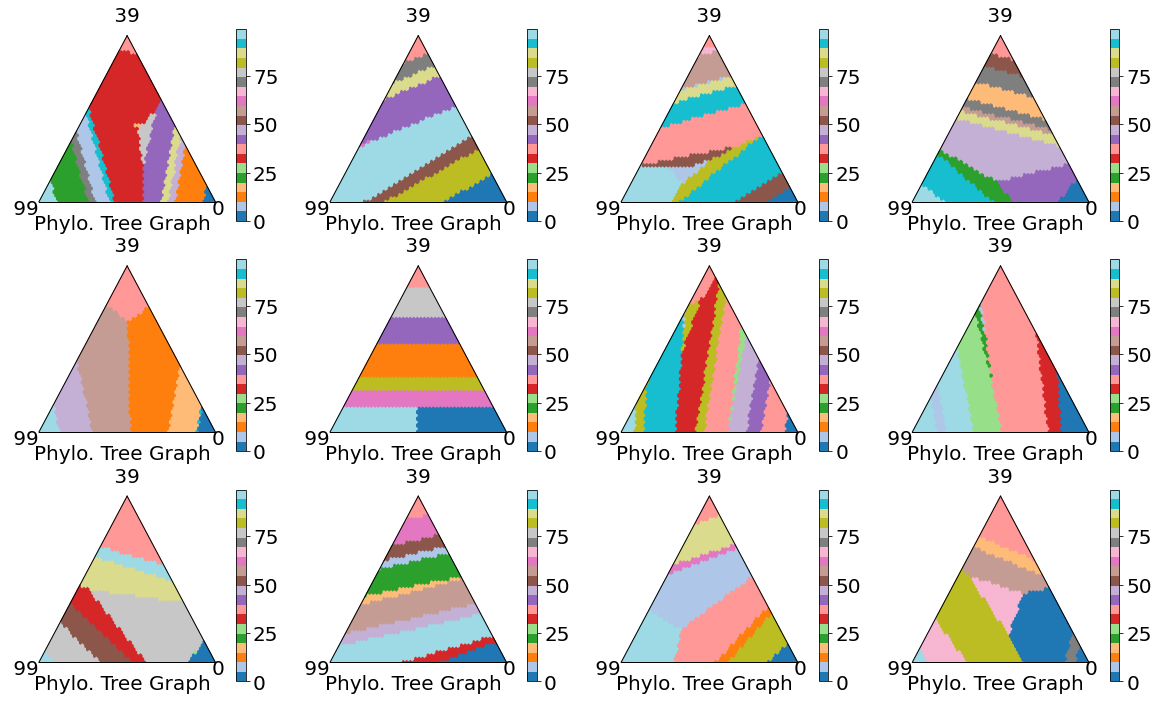

In [55]:

import matplotlib
from matplotlib.pyplot import colorbar
from functools import partial





font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

nrow = 3
ncol = 4
fig, axs = plt.subplots(nrow, ncol, figsize=(5*ncol, 4*nrow))

for i in range(len(axs)):
    for j in range(len(axs[i])):

        n = 100
        #G = nx.connected_watts_strogatz_graph(n=n, k=5, p=0.8)
        #G = nx.grid_graph(dim=(10, 10))
        G = nx.random_tree(n*10)
        leaves = [x for x in G.nodes() if G.degree(x) == 1]
        len(leaves)
        keepinds = leaves[:n]
        d = nx.floyd_warshall_numpy(G)
        d = d[keepinds][:, keepinds]
        d2 = d**2
        #nx.draw(G)
        #plt.matshow(d)
        inds = []

        mid = 39

        def argmax(p):
            classes = np.array([0, mid, n-1])
            return classes[np.argmax(p)]

        def frechet_mean(p, d2):
            p = np.array(p)
            p = p[None, :]
            return np.argmin(np.dot(p, d2[[0, mid, n-1], :]), axis=1)

        scale = 50
        figure, tax = ternary.figure(ax=axs[i,j], scale=scale)
        #figure.set_size_inches(5, 4)
        tax.heatmapf(
            partial(frechet_mean, d2=d2), 
            # argmax,
            boundary=True, style="hexagonal", 
            cmap=cm.get_cmap('tab20', n))
        tax.boundary(linewidth=1.0)
        #tax.set_title("Loki class predictions")
        tax.bottom_axis_label("Phylo. Tree Graph", offset=0.1)
        tax.right_corner_label("0   ")
        tax.top_corner_label(f" {mid} ")
        tax.left_corner_label(" 99 ")
        #tax.ticks(axis='lbr', linewidth=1, multiple=5)
        tax.clear_matplotlib_ticks()
        tax.get_axes().axis('off')

        #tax.savefig('frechet.pdf')



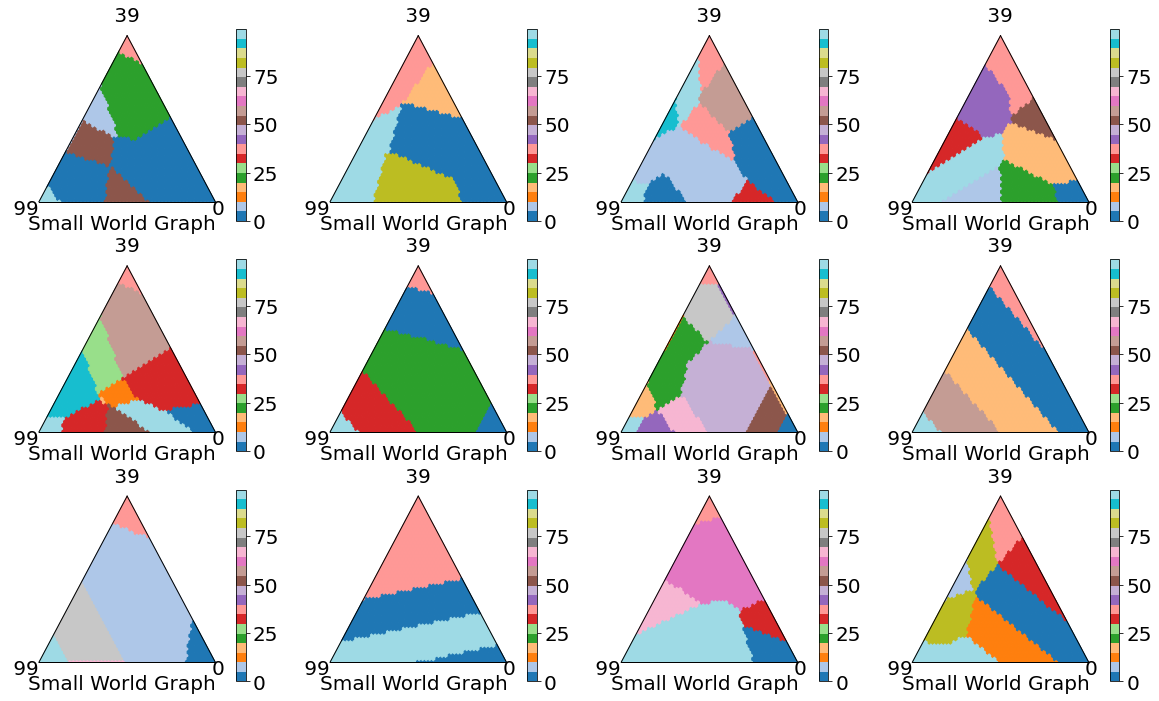

In [48]:

import matplotlib
from matplotlib.pyplot import colorbar
from functools import partial





font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

nrow = 3
ncol = 4
fig, axs = plt.subplots(nrow, ncol, figsize=(5*ncol, 4*nrow))

for i in range(len(axs)):
    for j in range(len(axs[i])):

        n = 100
        G = nx.connected_watts_strogatz_graph(n=n, k=5, p=0.8)
        #G = nx.grid_graph(dim=(10, 10))
        #G = nx.random_tree(n)

        d = nx.floyd_warshall_numpy(G)
        d2 = d**2
        #nx.draw(G)
        #plt.matshow(d)
        inds = []

        mid = 39

        def argmax(p):
            classes = np.array([0, mid, n-1])
            return classes[np.argmax(p)]

        def frechet_mean(p, d2):
            p = np.array(p)
            p = p[None, :]
            return np.argmin(np.dot(p, d2[[0, mid, n-1], :]), axis=1)

        scale = 50
        figure, tax = ternary.figure(ax=axs[i,j], scale=scale)
        #figure.set_size_inches(5, 4)
        tax.heatmapf(
            partial(frechet_mean, d2=d2), 
            # argmax,
            boundary=True, style="hexagonal", 
            cmap=cm.get_cmap('tab20', n))
        tax.boundary(linewidth=1.0)
        #tax.set_title("Loki class predictions")
        tax.bottom_axis_label("Small World Graph", offset=0.1)
        tax.right_corner_label("0   ")
        tax.top_corner_label(f" {mid} ")
        tax.left_corner_label(" 99 ")
        #tax.ticks(axis='lbr', linewidth=1, multiple=5)
        tax.clear_matplotlib_ticks()
        tax.get_axes().axis('off')

        #tax.savefig('frechet.pdf')



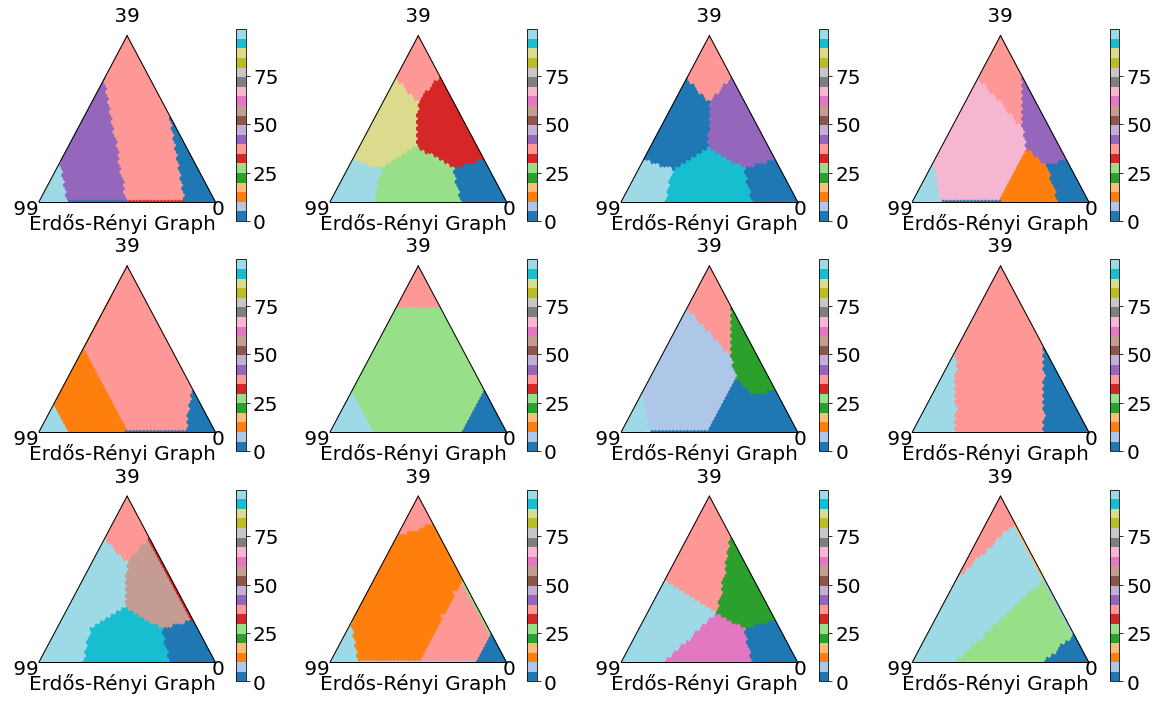

In [52]:

import matplotlib
from matplotlib.pyplot import colorbar
from functools import partial





font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

nrow = 3
ncol = 4
fig, axs = plt.subplots(nrow, ncol, figsize=(5*ncol, 4*nrow))

for i in range(len(axs)):
    for j in range(len(axs[i])):

        n = 100
        G = nx.erdos_renyi_graph(n=n, p=0.1)
        #G = nx.grid_graph(dim=(10, 10))
        #G = nx.random_tree(n)

        d = nx.floyd_warshall_numpy(G)
        d2 = d**2
        #nx.draw(G)
        #plt.matshow(d)
        inds = []

        mid = 39

        def argmax(p):
            classes = np.array([0, mid, n-1])
            return classes[np.argmax(p)]

        def frechet_mean(p, d2):
            p = np.array(p)
            p = p[None, :]
            return np.argmin(np.dot(p, d2[[0, mid, n-1], :]), axis=1)

        scale = 50
        figure, tax = ternary.figure(ax=axs[i,j], scale=scale)
        #figure.set_size_inches(5, 4)
        tax.heatmapf(
            partial(frechet_mean, d2=d2), 
            # argmax,
            boundary=True, style="hexagonal", 
            cmap=cm.get_cmap('tab20', n))
        tax.boundary(linewidth=1.0)
        #tax.set_title("Loki class predictions")
        tax.bottom_axis_label("Erdős-Rényi Graph", offset=0.1)
        tax.right_corner_label("0   ")
        tax.top_corner_label(f" {mid} ")
        tax.left_corner_label(" 99 ")
        #tax.ticks(axis='lbr', linewidth=1, multiple=5)
        tax.clear_matplotlib_ticks()
        tax.get_axes().axis('off')

        #tax.savefig('frechet.pdf')



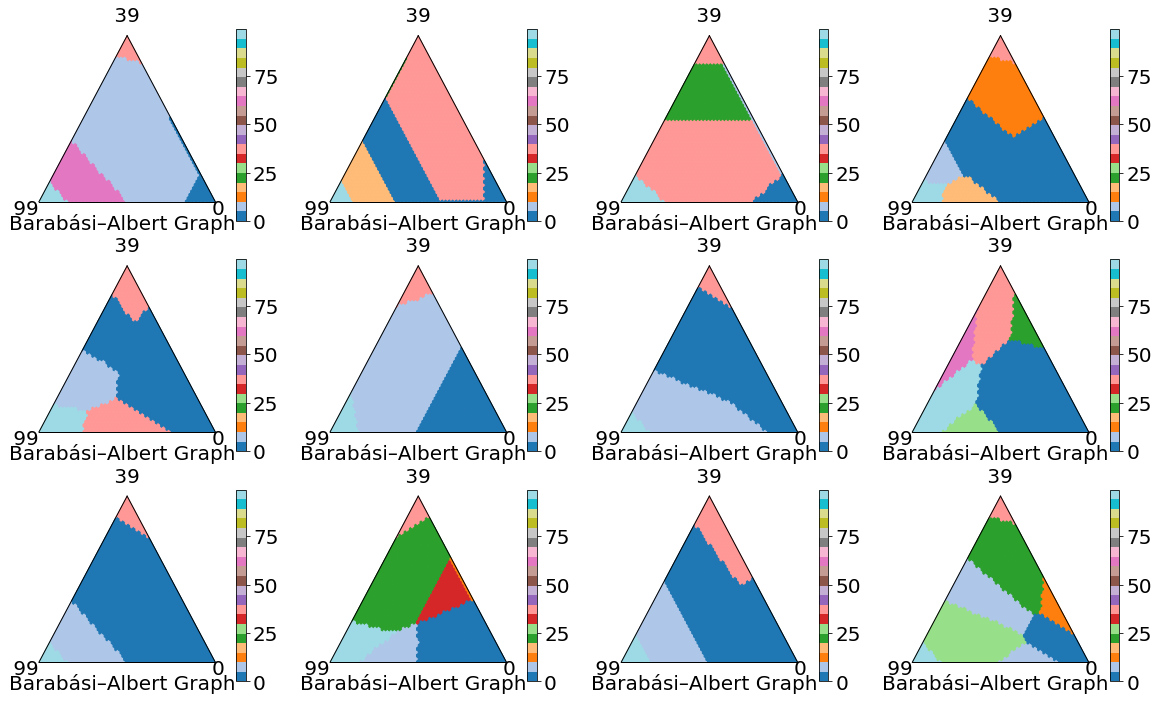

In [54]:

import matplotlib
from matplotlib.pyplot import colorbar
from functools import partial





font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

nrow = 3
ncol = 4
fig, axs = plt.subplots(nrow, ncol, figsize=(5*ncol, 4*nrow))

for i in range(len(axs)):
    for j in range(len(axs[i])):

        n = 100
        G = nx.barabasi_albert_graph(n=n, m=2)
        #G = nx.grid_graph(dim=(10, 10))
        #G = nx.random_tree(n)

        d = nx.floyd_warshall_numpy(G)
        d2 = d**2
        #nx.draw(G)
        #plt.matshow(d)
        inds = []

        mid = 39

        def argmax(p):
            classes = np.array([0, mid, n-1])
            return classes[np.argmax(p)]

        def frechet_mean(p, d2):
            p = np.array(p)
            p = p[None, :]
            return np.argmin(np.dot(p, d2[[0, mid, n-1], :]), axis=1)

        scale = 50
        figure, tax = ternary.figure(ax=axs[i,j], scale=scale)
        #figure.set_size_inches(5, 4)
        tax.heatmapf(
            partial(frechet_mean, d2=d2), 
            # argmax,
            boundary=True, style="hexagonal", 
            cmap=cm.get_cmap('tab20', n))
        tax.boundary(linewidth=1.0)
        #tax.set_title("Loki class predictions")
        tax.bottom_axis_label("Barabási–Albert Graph", offset=0.1)
        tax.right_corner_label("0   ")
        tax.top_corner_label(f" {mid} ")
        tax.left_corner_label(" 99 ")
        #tax.ticks(axis='lbr', linewidth=1, multiple=5)
        tax.clear_matplotlib_ticks()
        tax.get_axes().axis('off')

        #tax.savefig('frechet.pdf')



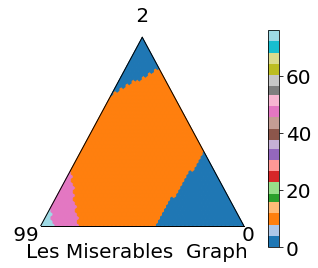

In [69]:

import matplotlib
from matplotlib.pyplot import colorbar
from functools import partial


G = nx.les_miserables_graph()
n = len(G.nodes)
#G = nx.grid_graph(dim=(10, 10))
#G = nx.random_tree(n)

d = nx.floyd_warshall_numpy(G)
d2 = d**2
#nx.draw(G)
#plt.matshow(d)
inds = []

mid = np.random.choice(n)

def argmax(p):
    classes = np.array([0, mid, n-1])
    return classes[np.argmax(p)]

def frechet_mean(p, d2):
    p = np.array(p)
    p = p[None, :]
    return np.argmin(np.dot(p, d2[[0, mid, n-1], :]), axis=1)





font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

scale = 50
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5, 4)
tax.heatmapf(
    partial(frechet_mean, d2=d2), 
    # argmax,
    boundary=True, style="hexagonal", 
    cmap=cm.get_cmap('tab20', n))
tax.boundary(linewidth=1.0)
#tax.set_title("Loki class predictions")
tax.bottom_axis_label("Les Miserables Graph", offset=0.1)
tax.right_corner_label("0   ")
tax.top_corner_label(f" {mid} ")
tax.left_corner_label(" 99 ")
#tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

plt.show()



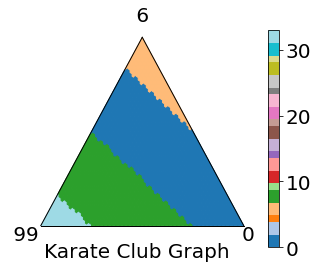

In [73]:

import matplotlib
from matplotlib.pyplot import colorbar
from functools import partial


G = nx.karate_club_graph()
n = len(G.nodes)
#G = nx.grid_graph(dim=(10, 10))
#G = nx.random_tree(n)

d = nx.floyd_warshall_numpy(G)
d2 = d**2
#nx.draw(G)
#plt.matshow(d)
inds = []

mid = np.random.choice(n)

def argmax(p):
    classes = np.array([0, mid, n-1])
    return classes[np.argmax(p)]

def frechet_mean(p, d2):
    p = np.array(p)
    p = p[None, :]
    return np.argmin(np.dot(p, d2[[0, mid, n-1], :]), axis=1)





font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

scale = 50
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5, 4)
tax.heatmapf(
    partial(frechet_mean, d2=d2), 
    # argmax,
    boundary=True, style="hexagonal", 
    cmap=cm.get_cmap('tab20', n))
tax.boundary(linewidth=1.0)
#tax.set_title("Loki class predictions")
tax.bottom_axis_label("Karate Club Graph", offset=0.1)
tax.right_corner_label("0   ")
tax.top_corner_label(f" {mid} ")
tax.left_corner_label(" 99 ")
#tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

plt.show()



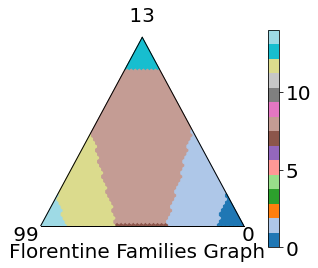

In [71]:

import matplotlib
from matplotlib.pyplot import colorbar
from functools import partial


G = nx.florentine_families_graph()
n = len(G.nodes)
#G = nx.grid_graph(dim=(10, 10))
#G = nx.random_tree(n)

d = nx.floyd_warshall_numpy(G)
d2 = d**2
#nx.draw(G)
#plt.matshow(d)
inds = []

mid = np.random.choice(n)

def argmax(p):
    classes = np.array([0, mid, n-1])
    return classes[np.argmax(p)]

def frechet_mean(p, d2):
    p = np.array(p)
    p = p[None, :]
    return np.argmin(np.dot(p, d2[[0, mid, n-1], :]), axis=1)





font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

scale = 50
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5, 4)
tax.heatmapf(
    partial(frechet_mean, d2=d2), 
    # argmax,
    boundary=True, style="hexagonal", 
    cmap=cm.get_cmap('tab20', n))
tax.boundary(linewidth=1.0)
#tax.set_title("Loki class predictions")
tax.bottom_axis_label("Florentine Families Graph", offset=0.1)
tax.right_corner_label("0   ")
tax.top_corner_label(f" {mid} ")
tax.left_corner_label(" 99 ")
#tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

plt.show()



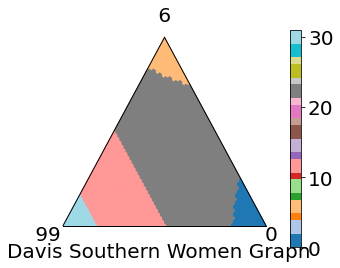

In [72]:

import matplotlib
from matplotlib.pyplot import colorbar
from functools import partial


G = nx.davis_southern_women_graph()
n = len(G.nodes)
#G = nx.grid_graph(dim=(10, 10))
#G = nx.random_tree(n)

d = nx.floyd_warshall_numpy(G)
d2 = d**2
#nx.draw(G)
#plt.matshow(d)
inds = []

mid = np.random.choice(n)

def argmax(p):
    classes = np.array([0, mid, n-1])
    return classes[np.argmax(p)]

def frechet_mean(p, d2):
    p = np.array(p)
    p = p[None, :]
    return np.argmin(np.dot(p, d2[[0, mid, n-1], :]), axis=1)





font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

scale = 50
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5, 4)
tax.heatmapf(
    partial(frechet_mean, d2=d2), 
    # argmax,
    boundary=True, style="hexagonal", 
    cmap=cm.get_cmap('tab20', n))
tax.boundary(linewidth=1.0)
#tax.set_title("Loki class predictions")
tax.bottom_axis_label("Davis Southern Women Graph", offset=0.1)
tax.right_corner_label("0   ")
tax.top_corner_label(f" {mid} ")
tax.left_corner_label(" 99 ")
#tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

plt.show()

